## Análisis de accidentes - Buses

### Area metropolitana del Valle de Aburrá

Manuela Cordoba

Alejandro Fernandez

Ana María Jaramillo


In [42]:
import pandas as pd
import missingno as msno
from sklearn.impute import KNNImputer
import config

In [43]:
cleaned_data = pd.read_excel(config.CLEANED_DATA)
cleaned_data.head()

,radicado,periodo,tipo_geoco,gravedad,barrio,mes,dia,longitud,latitud,areagralus,...,clase_vehiculo,tipo_servicio,marca,modelo,zona,diseno,edad_conductor,sexo,dia_semana,hora
0,1739400,2021,malla_vial,herido,prado,2,25,-75.563376,6.263505,areas_y_corredores_de_alta_mixtura,...,bus,publico,modasa,2011.0,comuna_3,glorieta,45.0,masculino,jue,14
1,1735512,2021,malla_vial,solo_danos,el_progreso,1,14,-75.578933,6.271674,areas_y_corredores_de_media_mixtura,...,automovil,particular,mazda,2011.0,comuna_7,tramo_de_via,30.0,masculino,jue,18
2,1735512,2021,malla_vial,solo_danos,el_progreso,1,14,-75.578933,6.271674,areas_y_corredores_de_media_mixtura,...,bus,publico,agrale,2008.0,comuna_7,tramo_de_via,58.0,masculino,jue,18
3,1735374,2021,malla_vial,solo_danos,caribe,1,13,-75.575081,6.266311,areas_y_corredores_de_alta_mixtura,...,automovil,particular,renault,2017.0,comuna_7,tramo_de_via,55.0,masculino,mie,19
4,1735374,2021,malla_vial,solo_danos,caribe,1,13,-75.575081,6.266311,areas_y_corredores_de_alta_mixtura,...,bus,publico,chevrolet,2015.0,comuna_7,tramo_de_via,30.0,masculino,mie,19


In [44]:
# Nan count
nan_counts = cleaned_data.isna().sum()
print("Total de observaciones en cleaned_data: ", cleaned_data.shape[0])
print(nan_counts)

Total de observaciones en cleaned_data:  87649
radicado               0
periodo                0
tipo_geoco             0
gravedad               0
barrio              4103
mes                    0
dia                    0
longitud               0
latitud                0
areagralus          7993
cod_cat_us          7993
cod_subcat          7993
subcategor         16758
hierarchy           8276
road_class          8276
estrato_pr             0
clase_accidente        1
clase_vehiculo         4
tipo_servicio        273
marca                929
modelo               879
zona                   0
diseno                 0
edad_conductor        10
sexo                   0
dia_semana             0
hora                   0
dtype: int64


### Representación gráfica de datos faltantes

Aqui podemos visualizar la continuidad de la información en el data set. Los espacios blancos corresponden a valores faltantes.


<Axes: >

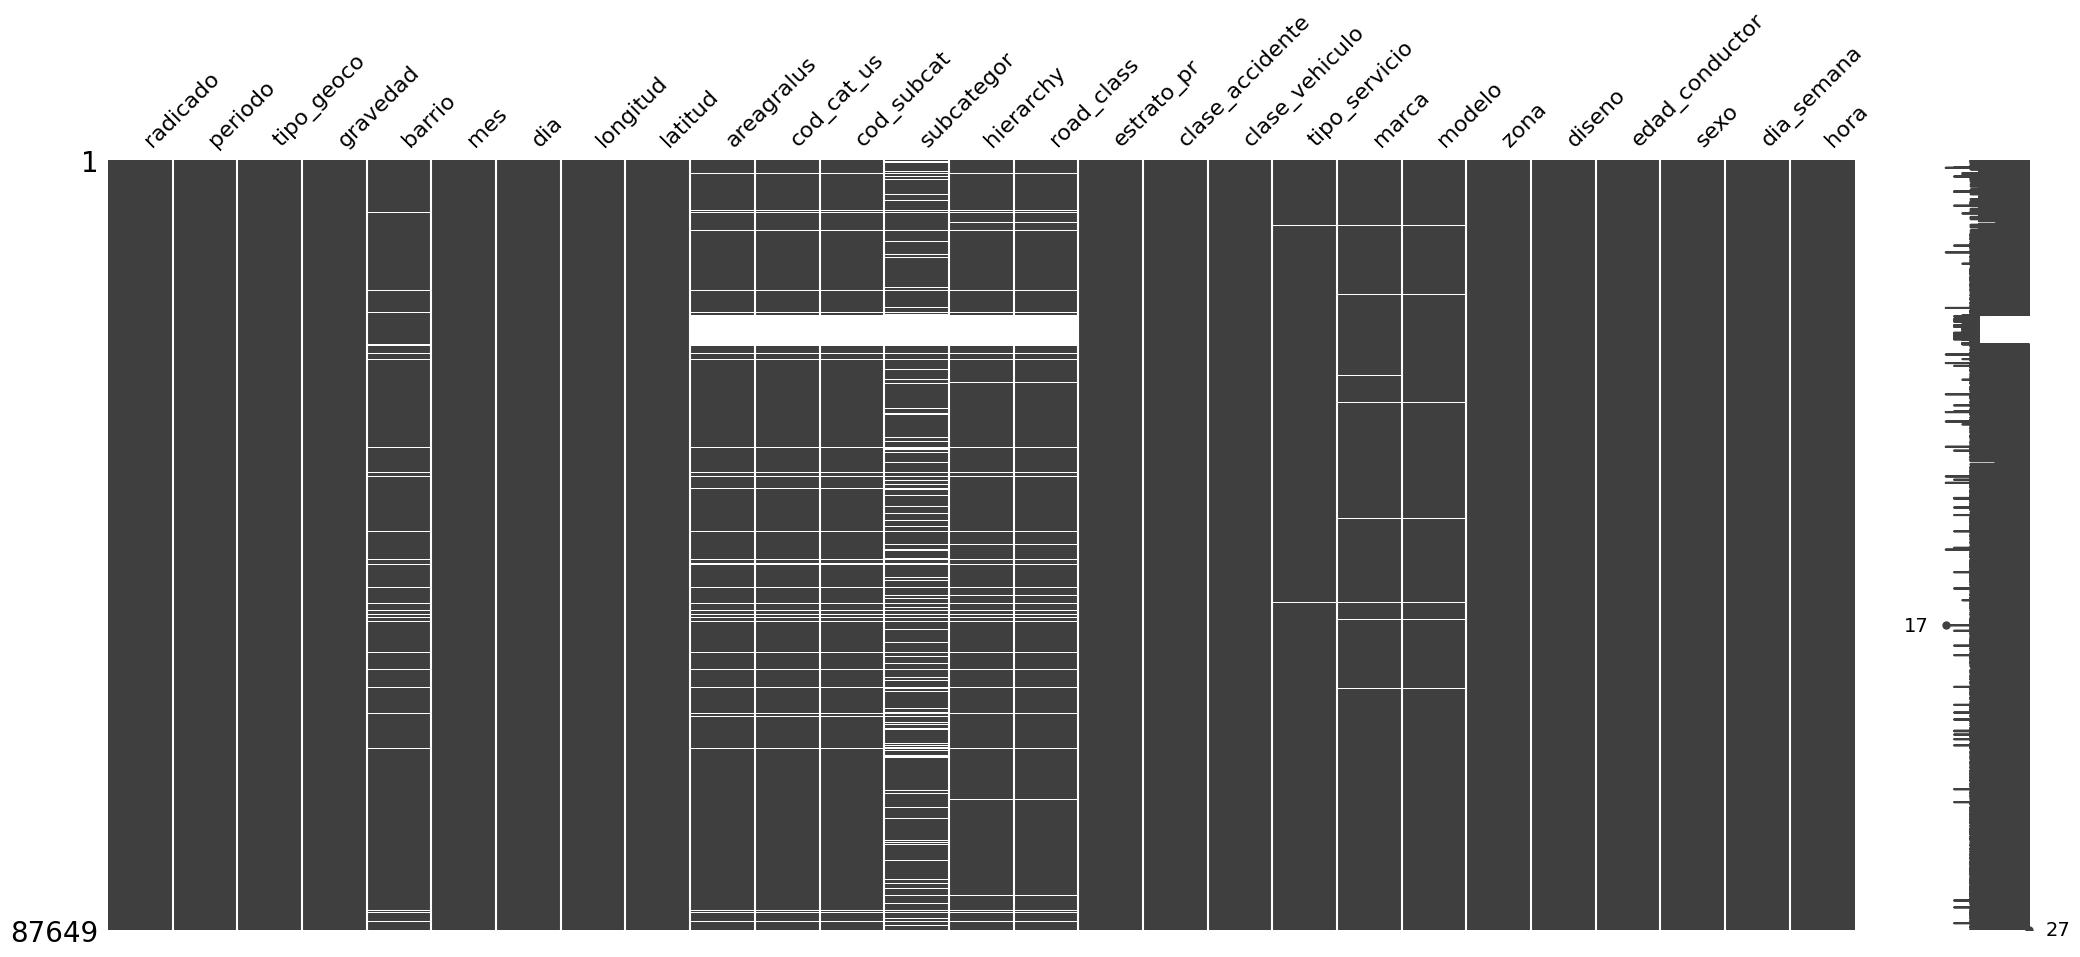

In [45]:
# Graphical visualization of missing values
msno.matrix(cleaned_data)

### Drop rows with extensive lack of values


In [46]:
cleaned_data_temp = cleaned_data.dropna(subset=["areagralus"])
cleaned_data_no_missing = cleaned_data_temp.reset_index(drop=True)
cleaned_data_no_missing.head()

,radicado,periodo,tipo_geoco,gravedad,barrio,mes,dia,longitud,latitud,areagralus,...,clase_vehiculo,tipo_servicio,marca,modelo,zona,diseno,edad_conductor,sexo,dia_semana,hora
0,1739400,2021,malla_vial,herido,prado,2,25,-75.563376,6.263505,areas_y_corredores_de_alta_mixtura,...,bus,publico,modasa,2011.0,comuna_3,glorieta,45.0,masculino,jue,14
1,1735512,2021,malla_vial,solo_danos,el_progreso,1,14,-75.578933,6.271674,areas_y_corredores_de_media_mixtura,...,automovil,particular,mazda,2011.0,comuna_7,tramo_de_via,30.0,masculino,jue,18
2,1735512,2021,malla_vial,solo_danos,el_progreso,1,14,-75.578933,6.271674,areas_y_corredores_de_media_mixtura,...,bus,publico,agrale,2008.0,comuna_7,tramo_de_via,58.0,masculino,jue,18
3,1735374,2021,malla_vial,solo_danos,caribe,1,13,-75.575081,6.266311,areas_y_corredores_de_alta_mixtura,...,automovil,particular,renault,2017.0,comuna_7,tramo_de_via,55.0,masculino,mie,19
4,1735374,2021,malla_vial,solo_danos,caribe,1,13,-75.575081,6.266311,areas_y_corredores_de_alta_mixtura,...,bus,publico,chevrolet,2015.0,comuna_7,tramo_de_via,30.0,masculino,mie,19


In [47]:
print("Cleaned data size without the massive missing data deleted: ", cleaned_data_no_missing.shape)

Cleaned data size without the massive missing data deleted:  (79656, 27)


### Re-inputation of missing values with KNN


In [48]:
categorical_columns = cleaned_data_no_missing.select_dtypes(include=["object"]).columns
print(categorical_columns)
cleaned_data_encoded = pd.get_dummies(
    cleaned_data_no_missing, columns=categorical_columns
)

Index(['tipo_geoco', 'gravedad', 'barrio', 'areagralus', 'subcategor',
       'clase_accidente', 'clase_vehiculo', 'tipo_servicio', 'marca', 'zona',
       'diseno', 'sexo', 'dia_semana'],
      dtype='object')


##### Juan Pineda: La siguiente celda parece tardar bastante en ejecutarse. Lo corri por 25 minutos y seguia... Por favor verifiquen que funcione o revisen si hay un error...
##### RESPUESTA: No había error, pero se estaban estimando con KNN todos los valores faltantes, incluso el bloque con las 6 columnas  entre areagralus y road_class.


In [49]:
imputer = KNNImputer(n_neighbors=5)  # You can adjust the number of neighbors as needed
cleaned_data_imputed = imputer.fit_transform(cleaned_data_encoded)
cleaned_data_imputed = pd.DataFrame(
    cleaned_data_imputed, columns=cleaned_data_encoded.columns
)

In [50]:
# Reverse the dummies
reversed_categorical_data = pd.DataFrame()

# Iterate through the original categorical columns
for column in categorical_columns:
    # Select the one-hot encoded columns related to the original column
    one_hot_columns = cleaned_data_imputed.filter(like=column)

    # Use idxmax(axis=1) to find the original category with the highest value
    reversed_categorical_data[column] = one_hot_columns.idxmax(axis=1)
reversed_categorical_data.head()

,tipo_geoco,gravedad,barrio,areagralus,subcategor,clase_accidente,clase_vehiculo,tipo_servicio,marca,zona,diseno,sexo,dia_semana
0,tipo_geoco_malla_vial,gravedad_herido,barrio_prado,areagralus_areas_y_corredores_de_alta_mixtura,subcategor_centralidades_con_predominancia_eco...,clase_accidente_caida_ocupante,clase_vehiculo_bus,tipo_servicio_publico,marca_modasa,zona_comuna_3,diseno_glorieta,sexo_masculino,dia_semana_jue
1,tipo_geoco_malla_vial,gravedad_solo_danos,barrio_el_progreso,areagralus_areas_y_corredores_de_media_mixtura,subcategor_zonas_de_transicion_centralidades_d...,clase_accidente_choque,clase_vehiculo_automovil,tipo_servicio_particular,marca_mazda,subcategor_zonas_de_transicion_centralidades_d...,diseno_tramo_de_via,sexo_masculino,dia_semana_jue
2,tipo_geoco_malla_vial,gravedad_solo_danos,barrio_el_progreso,areagralus_areas_y_corredores_de_media_mixtura,subcategor_zonas_de_transicion_centralidades_d...,clase_accidente_choque,clase_vehiculo_bus,tipo_servicio_publico,marca_agrale,subcategor_zonas_de_transicion_centralidades_d...,diseno_tramo_de_via,sexo_masculino,dia_semana_jue
3,tipo_geoco_malla_vial,gravedad_solo_danos,barrio_caribe,areagralus_areas_y_corredores_de_alta_mixtura,subcategor_areas_de_actividad_economica_en_tra...,clase_accidente_choque,clase_vehiculo_automovil,tipo_servicio_particular,marca_renault,zona_comuna_7,diseno_tramo_de_via,sexo_masculino,dia_semana_mie
4,tipo_geoco_malla_vial,gravedad_solo_danos,barrio_caribe,areagralus_areas_y_corredores_de_alta_mixtura,subcategor_areas_de_actividad_economica_en_tra...,clase_accidente_choque,clase_vehiculo_bus,tipo_servicio_publico,marca_chevrolet,zona_comuna_7,diseno_tramo_de_via,sexo_masculino,dia_semana_mie


##### Juan Pineda: La siguiente celda llama 'cleaned_data_imputed_encoded_df' pero eso no se ha definido. De casualidad es 'cleaned_data_imputed'? Si es así, por favor cambiar el nombre de la variable en la celda siguiente.

##### Corregido!

In [51]:
nan_counts_after_drop = cleaned_data_temp.isna().sum()
print(nan_counts_after_drop)

radicado              0
periodo               0
tipo_geoco            0
gravedad              0
barrio               67
mes                   0
dia                   0
longitud              0
latitud               0
areagralus            0
cod_cat_us            0
cod_subcat            0
subcategor         8765
hierarchy           878
road_class          878
estrato_pr            0
clase_accidente       1
clase_vehiculo        4
tipo_servicio       235
marca               823
modelo              775
zona                  0
diseno                0
edad_conductor       10
sexo                  0
dia_semana            0
hora                  0
dtype: int64


In [52]:
# Cathegorical
cleaned_data_no_missing["barrio"] = reversed_categorical_data["barrio"]
cleaned_data_no_missing["areagralus"] = reversed_categorical_data["areagralus"]
cleaned_data_no_missing["subcategor"] = reversed_categorical_data["subcategor"]
cleaned_data_no_missing["tipo_servicio"] = reversed_categorical_data["tipo_servicio"]
cleaned_data_no_missing["marca"] = reversed_categorical_data["marca"]
cleaned_data_no_missing["clase_accidente"] = reversed_categorical_data["clase_accidente"]
cleaned_data_no_missing["clase_vehiculo"] = reversed_categorical_data["clase_vehiculo"]

# Numerical 
cleaned_data_no_missing["cod_subcat"] = cleaned_data_imputed["cod_subcat"]
cleaned_data_no_missing["cod_cat_us"] = cleaned_data_imputed["cod_cat_us"]
cleaned_data_no_missing["hierarchy"] = cleaned_data_imputed["hierarchy"]
cleaned_data_no_missing["road_class"] = cleaned_data_imputed["road_class"]
cleaned_data_no_missing["modelo"] = cleaned_data_imputed["modelo"]
cleaned_data_no_missing["edad_conductor"] = cleaned_data_imputed["edad_conductor"]
cleaned_data_no_missing

,radicado,periodo,tipo_geoco,gravedad,barrio,mes,dia,longitud,latitud,areagralus,...,clase_vehiculo,tipo_servicio,marca,modelo,zona,diseno,edad_conductor,sexo,dia_semana,hora
0,1739400,2021,malla_vial,herido,barrio_prado,2,25,-75.563376,6.263505,areagralus_areas_y_corredores_de_alta_mixtura,...,clase_vehiculo_bus,tipo_servicio_publico,marca_modasa,2011.0,comuna_3,glorieta,45.0,masculino,jue,14
1,1735512,2021,malla_vial,solo_danos,barrio_el_progreso,1,14,-75.578933,6.271674,areagralus_areas_y_corredores_de_media_mixtura,...,clase_vehiculo_automovil,tipo_servicio_particular,marca_mazda,2011.0,comuna_7,tramo_de_via,30.0,masculino,jue,18
2,1735512,2021,malla_vial,solo_danos,barrio_el_progreso,1,14,-75.578933,6.271674,areagralus_areas_y_corredores_de_media_mixtura,...,clase_vehiculo_bus,tipo_servicio_publico,marca_agrale,2008.0,comuna_7,tramo_de_via,58.0,masculino,jue,18
3,1735374,2021,malla_vial,solo_danos,barrio_caribe,1,13,-75.575081,6.266311,areagralus_areas_y_corredores_de_alta_mixtura,...,clase_vehiculo_automovil,tipo_servicio_particular,marca_renault,2017.0,comuna_7,tramo_de_via,55.0,masculino,mie,19
4,1735374,2021,malla_vial,solo_danos,barrio_caribe,1,13,-75.575081,6.266311,areagralus_areas_y_corredores_de_alta_mixtura,...,clase_vehiculo_bus,tipo_servicio_publico,marca_chevrolet,2015.0,comuna_7,tramo_de_via,30.0,masculino,mie,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79651,1470979,2014,malla_vial_aproximada,solo_danos,barrio_la_candelaria,12,31,-75.568715,6.247466,areagralus_areas_y_corredores_de_alta_mixtura,...,clase_vehiculo_bus,tipo_servicio_publico,marca_daihatsu,2006.0,comuna_10,tramo_de_via,49.0,masculino,mie,16
79652,1470984,2014,malla_vial_cruce_invertido,solo_danos,barrio_la_candelaria,12,31,-75.564683,6.249282,areagralus_areas_y_corredores_de_alta_mixtura,...,clase_vehiculo_automovil,tipo_servicio_publico,marca_hyundai,2014.0,comuna_10,tramo_de_via,22.0,masculino,mie,13
79653,1470984,2014,malla_vial_cruce_invertido,solo_danos,barrio_la_candelaria,12,31,-75.564683,6.249282,areagralus_areas_y_corredores_de_alta_mixtura,...,clase_vehiculo_bus,tipo_servicio_publico,marca_modasa,2013.0,comuna_10,tramo_de_via,41.0,masculino,mie,13
79654,1470985,2014,malla_vial_aproximada,solo_danos,barrio_los_mangos,12,31,-75.541845,6.249259,areagralus_areas_de_baja_mixtura,...,clase_vehiculo_automovil,tipo_servicio_particular,marca_chevrolet,2009.0,comuna_8,ciclo_ruta,41.0,masculino,mie,15


In [53]:
nan_counts_temp = cleaned_data_no_missing.isna().sum()
print(nan_counts_temp)

radicado           0
periodo            0
tipo_geoco         0
gravedad           0
barrio             0
mes                0
dia                0
longitud           0
latitud            0
areagralus         0
cod_cat_us         0
cod_subcat         0
subcategor         0
hierarchy          0
road_class         0
estrato_pr         0
clase_accidente    0
clase_vehiculo     0
tipo_servicio      0
marca              0
modelo             0
zona               0
diseno             0
edad_conductor     0
sexo               0
dia_semana         0
hora               0
dtype: int64


In [55]:
columns_to_remove_prefix = [
    "barrio",
    "areagralus",
    "subcategor",
    "tipo_servicio",
    "marca",
    "clase_accidente",
    "clase_vehiculo"
]

for column in columns_to_remove_prefix:
    cleaned_data_no_missing[column] = cleaned_data_no_missing[column].str.replace(
        f"{column}_", ""
    )
cleaned_data_no_missing

,radicado,periodo,tipo_geoco,gravedad,barrio,mes,dia,longitud,latitud,areagralus,...,clase_vehiculo,tipo_servicio,marca,modelo,zona,diseno,edad_conductor,sexo,dia_semana,hora
0,1739400,2021,malla_vial,herido,prado,2,25,-75.563376,6.263505,areas_y_corredores_de_alta_mixtura,...,bus,publico,modasa,2011.0,comuna_3,glorieta,45.0,masculino,jue,14
1,1735512,2021,malla_vial,solo_danos,el_progreso,1,14,-75.578933,6.271674,areas_y_corredores_de_media_mixtura,...,automovil,particular,mazda,2011.0,comuna_7,tramo_de_via,30.0,masculino,jue,18
2,1735512,2021,malla_vial,solo_danos,el_progreso,1,14,-75.578933,6.271674,areas_y_corredores_de_media_mixtura,...,bus,publico,agrale,2008.0,comuna_7,tramo_de_via,58.0,masculino,jue,18
3,1735374,2021,malla_vial,solo_danos,caribe,1,13,-75.575081,6.266311,areas_y_corredores_de_alta_mixtura,...,automovil,particular,renault,2017.0,comuna_7,tramo_de_via,55.0,masculino,mie,19
4,1735374,2021,malla_vial,solo_danos,caribe,1,13,-75.575081,6.266311,areas_y_corredores_de_alta_mixtura,...,bus,publico,chevrolet,2015.0,comuna_7,tramo_de_via,30.0,masculino,mie,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79651,1470979,2014,malla_vial_aproximada,solo_danos,la_candelaria,12,31,-75.568715,6.247466,areas_y_corredores_de_alta_mixtura,...,bus,publico,daihatsu,2006.0,comuna_10,tramo_de_via,49.0,masculino,mie,16
79652,1470984,2014,malla_vial_cruce_invertido,solo_danos,la_candelaria,12,31,-75.564683,6.249282,areas_y_corredores_de_alta_mixtura,...,automovil,publico,hyundai,2014.0,comuna_10,tramo_de_via,22.0,masculino,mie,13
79653,1470984,2014,malla_vial_cruce_invertido,solo_danos,la_candelaria,12,31,-75.564683,6.249282,areas_y_corredores_de_alta_mixtura,...,bus,publico,modasa,2013.0,comuna_10,tramo_de_via,41.0,masculino,mie,13
79654,1470985,2014,malla_vial_aproximada,solo_danos,los_mangos,12,31,-75.541845,6.249259,areas_de_baja_mixtura,...,automovil,particular,chevrolet,2009.0,comuna_8,ciclo_ruta,41.0,masculino,mie,15


### Export data


In [56]:
cleaned_data_no_missing.to_excel(config.CLEANED_DATA_NO_MISSING, index=False)